In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

sns.set_style("white")
pd.set_option('display.max_columns', 9999)
global_palette = ["#020659","#ED1C24","#F4C47F","#D38D28"]

In [2]:
def barplot(col, axi, hue = None):
    if hue == None:
        plot_data = data.groupby(col).count()[["customerID"]]
        bar_index = plot_data.index
        return sns.barplot(data=plot_data, x=bar_index, y="customerID", palette=global_palette, ax=axi, hue=None)
    else:
        plot_data = data.groupby([col,hue]).count()[["customerID"]].reset_index()
        bar_index = plot_data[col]
        return sns.barplot(data=plot_data, x=bar_index, y="customerID", palette=global_palette, ax=axi, hue=hue)

In [3]:
data = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data["TotalCharges"][data["TotalCharges"] == " "] = data.MonthlyCharges
data["TotalCharges"] = data.TotalCharges.astype("float64")
data["SeniorCitizen"] = data["SeniorCitizen"].astype("str")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


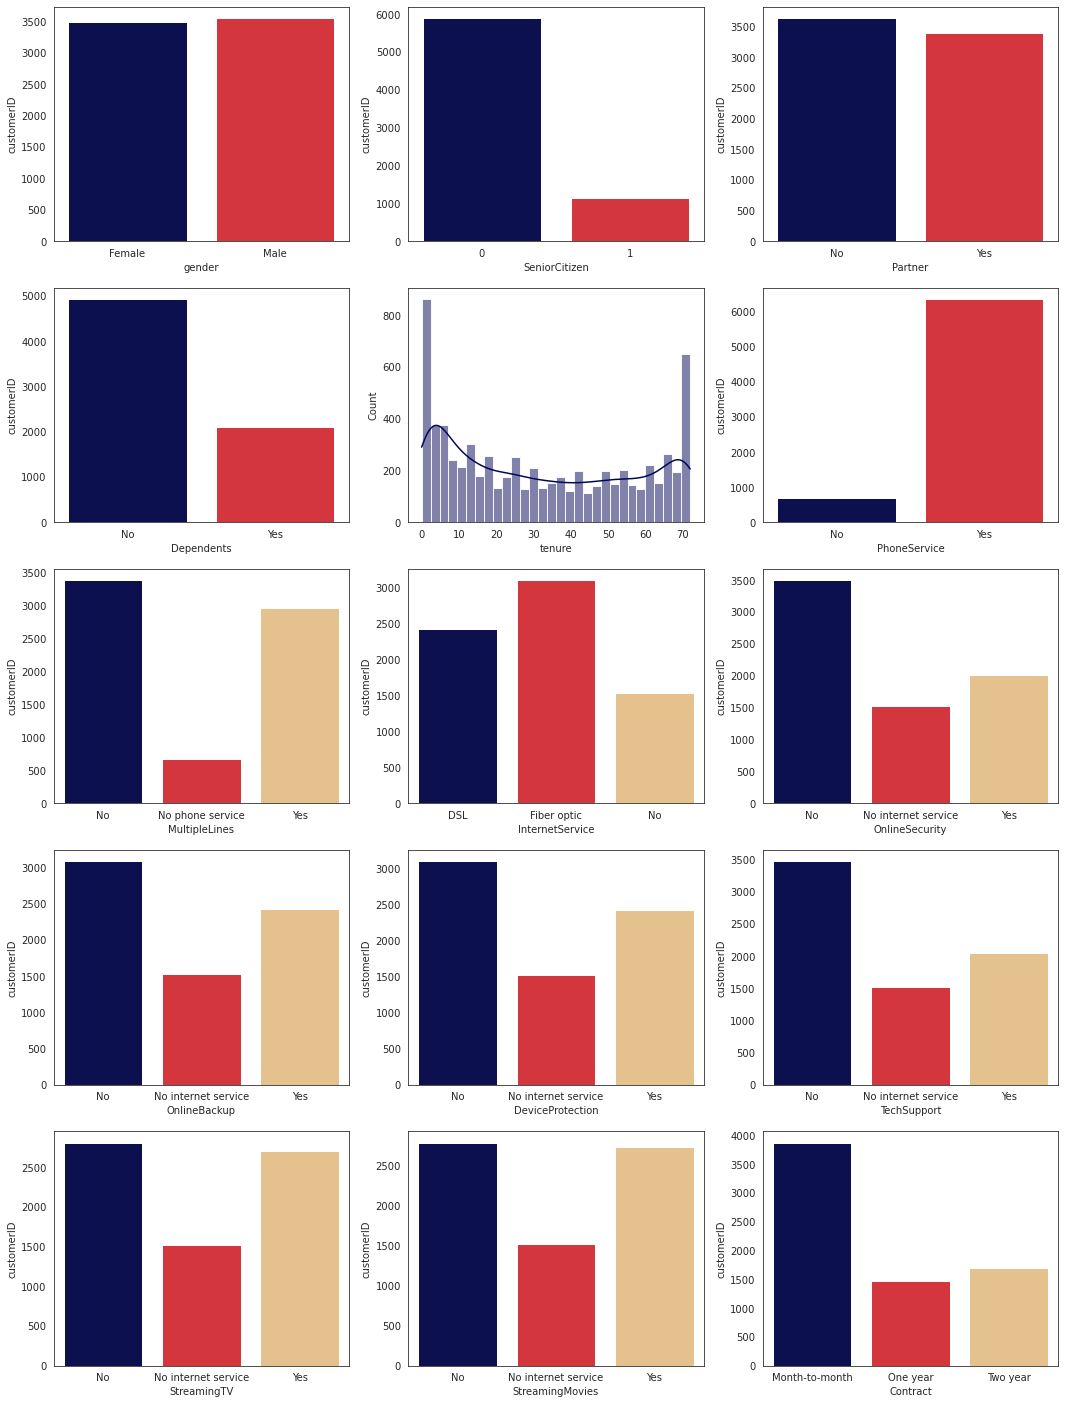

In [7]:
fig, ax = plt.subplots(5,3,figsize=(18,25))
colist = data.drop("customerID",axis=1).columns
colnum = 0
for row in range(5):
    for col in range(3):
        if data[[colist[colnum]]].dtypes[colist[colnum]] == "O" :
            barplot(colist[colnum],ax[row,col])
        else :
            sns.histplot(data[colist[colnum]], color=global_palette[0], ax=ax[row,col], bins=30, kde=True)
        colnum = colnum + 1
plt.show()

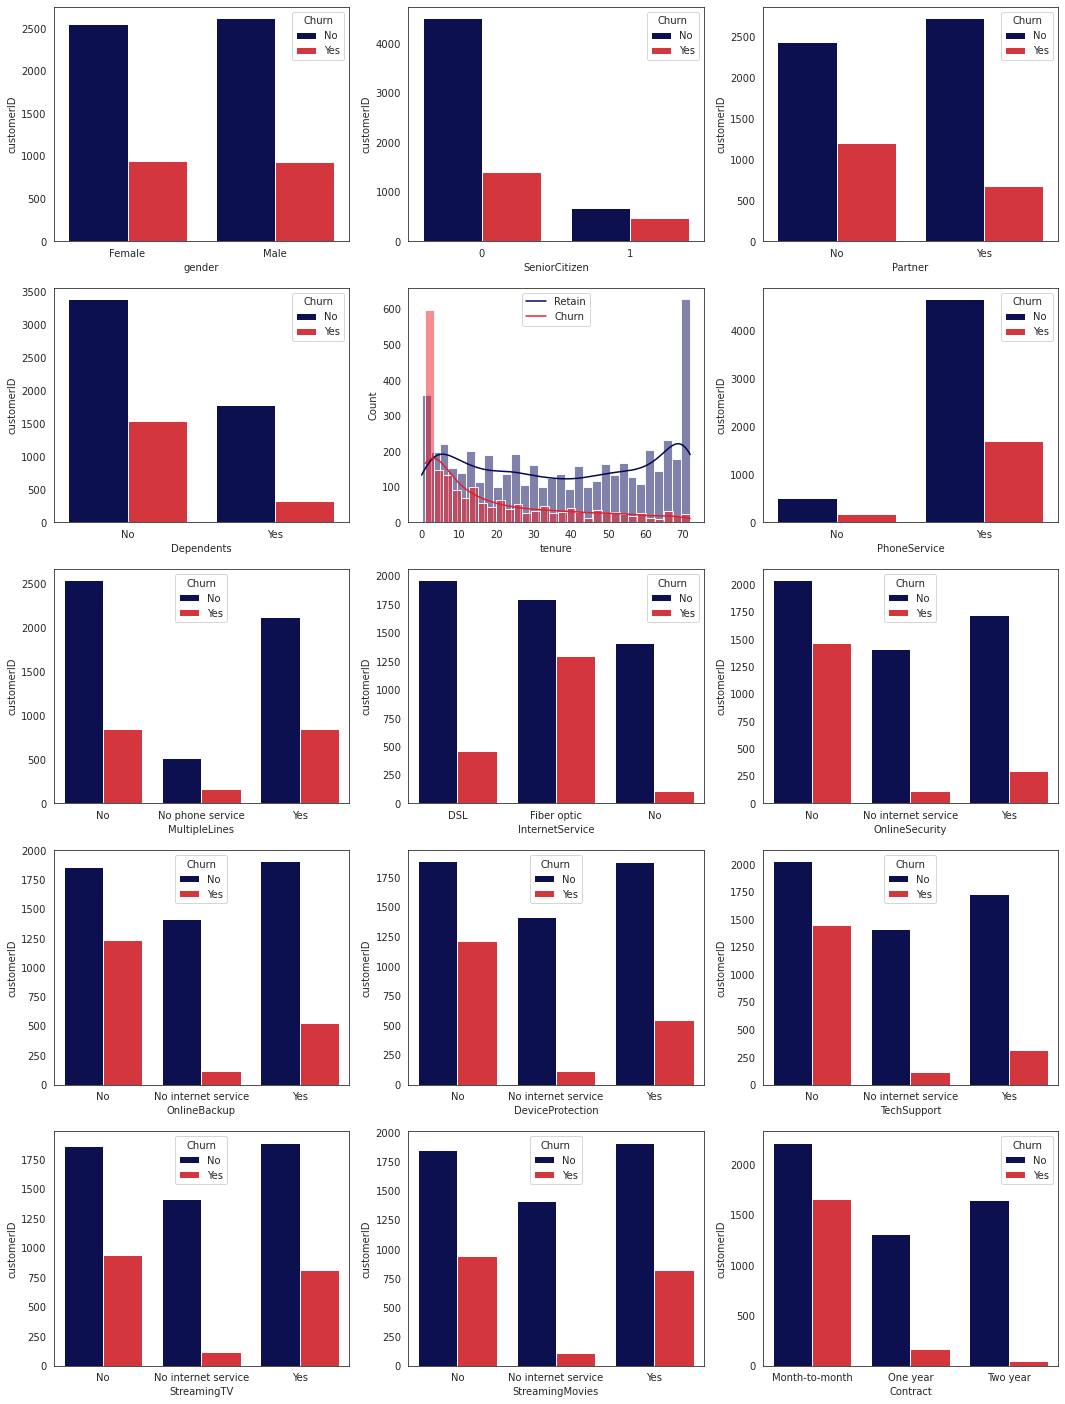

In [8]:
fig, ax = plt.subplots(5,3,figsize=(18,25))
colist = data.drop("customerID",axis=1).columns
colnum = 0
for row in range(5):
    for col in range(3):
        if data[[colist[colnum]]].dtypes[colist[colnum]] == "O" :
            barplot(colist[colnum],ax[row,col],"Churn")
        else :
            sns.histplot(data[data.Churn == "No"][colist[colnum]], color=global_palette[0], ax=ax[row,col], bins=30, kde=True)
            sns.histplot(data[colist[colnum]][data.Churn == "Yes"], color=global_palette[1], ax=ax[row,col], bins=30, kde=True)
            ax[row,col].legend(["Retain","Churn"])
        colnum = colnum + 1
        
plt.show()

In [9]:
dataset = data[["Churn"]].copy()
for col in data.drop(["Churn","customerID"],axis=1).columns:
    dataset = pd.concat([dataset,pd.get_dummies(data[[col]])],axis=1)
dataset["Churn"][dataset.Churn == "No"] = 0
dataset["Churn"][dataset.Churn == "Yes"] = 1
for col in dataset.columns:
    try:
        dataset[col] = dataset[col].astype("float")
    except:
        pass
dataset.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,29.85,29.85
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,34.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,56.95,1889.50
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,53.85,108.15
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,45.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,42.30,1840.75
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,70.70,151.65


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7043 non-null   float64
 1   gender_Female                            7043 non-null   float64
 2   gender_Male                              7043 non-null   float64
 3   SeniorCitizen_0                          7043 non-null   float64
 4   SeniorCitizen_1                          7043 non-null   float64
 5   Partner_No                               7043 non-null   float64
 6   Partner_Yes                              7043 non-null   float64
 7   Dependents_No                            7043 non-null   float64
 8   Dependents_Yes                           7043 non-null   float64
 9   tenure                                   7043 non-null   float64
 10  PhoneService_No                          7043 no

In [11]:
X = dataset.drop("Churn",axis=1)
y = dataset[["Churn"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [12]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

y_test["predicted"] = y_pred
y_test["predicted_proba"] = y_pred_proba[:,1]
y_test.head()

,Churn,predicted,predicted_proba
2905,0.0,0,0.147417
6651,0.0,0,0.027337
5321,0.0,0,0.091800
4293,1.0,1,0.863030
5686,1.0,1,0.708705


In [13]:
feature_importance = pd.DataFrame()
feature_importance["feature"] = model.feature_names_in_
feature_importance["value"] = model.feature_importances_
feature_importance = feature_importance.sort_values("value", ascending=False).reset_index(drop=True)
feature_importance

,feature,value
0,Contract_Month-to-month,0.429649
1,InternetService_Fiber optic,0.247558
2,OnlineSecurity_No,0.032920
3,Contract_Two year,0.021181
4,PhoneService_No,0.020236
5,TechSupport_No,0.017597
6,StreamingMovies_Yes,0.017071
7,Contract_One year,0.014845
8,MultipleLines_Yes,0.014801
9,tenure,0.013435


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


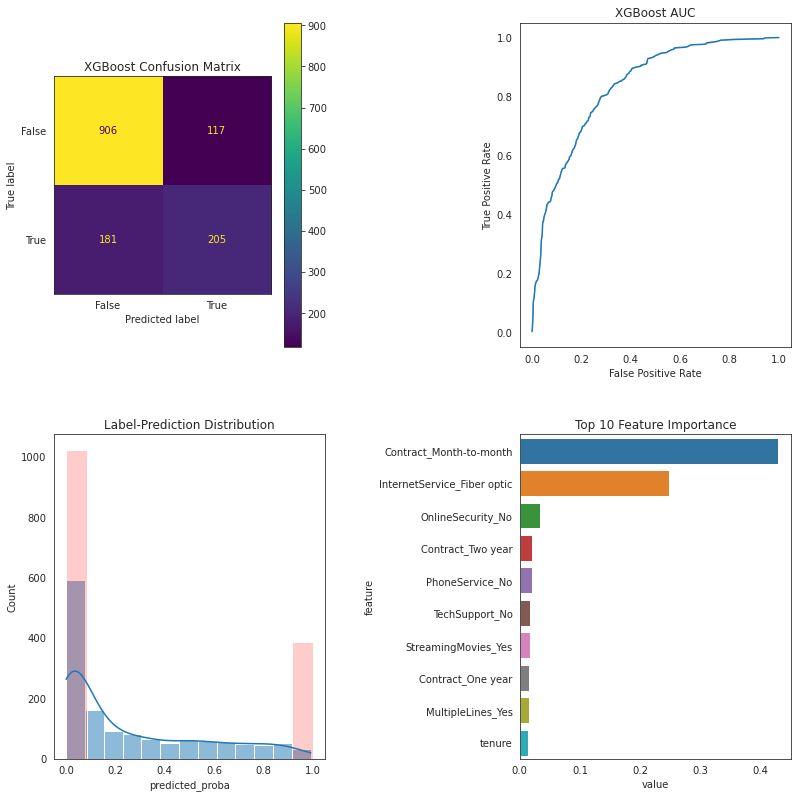

In [14]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
confusion_matrix = metrics.confusion_matrix(y_test.Churn, y_test.predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(ax=ax[0,0])
ax[0,0].set_title("XGBoost Confusion Matrix")

fpr, tpr, _ = metrics.roc_curve(y_test.Churn, y_test.predicted_proba)
sns.lineplot(fpr,tpr,ax=ax[0,1])
ax[0,1].set_xlabel('False Positive Rate')
ax[0,1].set_ylabel('True Positive Rate')
ax[0,1].set_title("XGBoost AUC")

sns.histplot(y_test.predicted_proba,kde=True,ax=ax[1,0])
sns.histplot(y_test.Churn,kde=False,ax=ax[1,0], color="red",alpha=0.2)
ax[1,0].set_title("Label-Prediction Distribution")

sns.barplot(data=feature_importance.iloc[0:10],x="value",y="feature",ax=ax[1,1])
ax[1,1].set_title("Top 10 Feature Importance")

fig.tight_layout(pad=4.0)
plt.show()

In [15]:
recallscore = recall_score(y_test.Churn, y_test.predicted, average='macro')
print("XGBoost Recall Score : ",recallscore)

XGBoost Recall Score :  0.7083592907176394
